In [428]:
from bs4 import BeautifulSoup as bs

In [429]:
import requests

In [430]:
import pandas as pd

In [431]:
# GET - запрос
url = 'https://www.kinonews.ru/top250imdb_p2/' # страница со всеми статьями 
page = requests.get(url)

In [432]:
page.status_code

200

In [433]:
soup = bs(page.text, 'html.parser')

In [434]:
page.text

'<!DOCTYPE html>\n<html lang="ru">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=yes">\n<link rel="icon" href="https://www.kinonews.ru/favicon.ico" type="image/x-icon">\n<link rel="shortcut icon" href="https://www.kinonews.ru/favicon.ico" type="image/x-icon">\n<meta property="twitter:domain" content="KinoNews.ru">\n<meta property="twitter:card" content="summary_large_image">\n<meta property="twitter:site" content="@KinoNewsRu">\n<meta name="twitter:creator" content="@KinoNewsRu">\n<meta name="twitter:card" content="summary_large_image">\n<title>Топ 250 лучших фильмов по версии портала о кино IMDb, страница 2</title>\n<meta name=\'title\' content=\'Топ 250 лучших фильмов по версии портала о кино IMDb, страница 2\'>\n<meta name=\'keywords\' content=\'топ 250 фильмов, топ 250 imdb, топ 250 лучших фильмов, топ 250 фильмов imdb, рейтинг imdb топ 250, страница 2\'>\t\n<meta name=

In [435]:
soup

<!DOCTYPE html>

<html lang="ru">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1, user-scalable=yes" name="viewport"/>
<link href="https://www.kinonews.ru/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="https://www.kinonews.ru/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="KinoNews.ru" property="twitter:domain"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="@KinoNewsRu" property="twitter:site"/>
<meta content="@KinoNewsRu" name="twitter:creator"/>
<meta content="summary_large_image" name="twitter:card"/>
<title>Топ 250 лучших фильмов по версии портала о кино IMDb, страница 2</title>
<meta content="Топ 250 лучших фильмов по версии портала о кино IMDb, страница 2" name="title"/>
<meta content="топ 250 фильмов, топ 250 imdb, топ 250 лучших фильмов, топ 250 фильмов imdb, рейтинг imdb топ 250, страница 2" name="keywords"/>
<meta content="Список 250

In [436]:
result_list = {'title_russia': [], 'title_english':[], 'date': [], 'country':[], 'genre': [],'duration': [],'rating': [], 'description': []}

In [437]:
pagenum = 1
for i in range(5):
    url = f'https://www.kinonews.ru/top250imdb_p{pagenum}/'
    page = requests.get(url)
    soup = bs(page.text, 'html.parser')
    
    titles = soup.find_all('a', class_='titlefilm')
    
    for title in titles: 
        try:
            # Переход на страницу статьи
            url_film = 'https://www.kinonews.ru' + title.get('href') 
            page_film = requests.get(url_film)
            soup_film = bs(page_film.text, 'html.parser')
            
            # Название фильма
            name_film_rus = soup_film.find('h1', class_='film') 
            name_film_eng = soup_film.find('div', class_='entitle')
            
            # Дата выпуска фильма
            release_date = soup_film.find('td', string="Год выпуска:")
            if release_date:
                release_date = release_date.find_next_sibling('td').text.strip()
            else:
                release_date = 'N/A'
            
            # Страны выпуска фильма
            meta_tags = soup_film.find_all('meta', {'itemprop': 'countryOfOrigin'})
            if meta_tags:
                countries = [tag['content'] for tag in meta_tags]
                country = ', '.join(countries)
            else:
                country = 'N/A'  
            
            # Жанр
            genre_tags = soup_film.find_all('span', itemprop="genre")
            # Берем только первый жанр (если есть)
            recommend_genre = genre_tags[0].text.strip() if genre_tags else 'N/A'
                
            # Длительность фильма        
            duration_film = soup_film.find('td', string="Продолжительность:")
            duration = duration_film.find_next_sibling('td').text.strip() if duration_film else 'N/A'
            
            # Рейтинг - с проверкой на существование
            rating_film = soup_film.find('meta', itemprop="ratingValue")
            rating = rating_film.get('content') if rating_film else 'N/A'
            
            # Описание фильма
            discription_film = soup_film.find('div', itemprop="description") 
            if discription_film:
                discription_film = discription_film.text.strip()
            else:
                discription_film = 'N/A'
                
            # Добавляем данные только если есть русское название
            if name_film_rus:
                result_list['title_russia'].append(name_film_rus.text.strip())
                result_list['title_english'].append(name_film_eng.text.strip() if name_film_eng else 'N/A')
                result_list['date'].append(release_date)
                result_list['country'].append(country)
                result_list['genre'].append(recommend_genre)
                result_list['duration'].append(duration)
                result_list['rating'].append(rating)
                result_list['description'].append(discription_film)
            
        except Exception as e:
            print(f"Ошибка при обработке фильма {title.get('href')}: {e}")
            continue
            
    pagenum += 1

In [438]:
result_list

{'title_russia': ['Побег из Шоушенка',
  'Крестный отец',
  'Темный рыцарь',
  'Крестный отец 2',
  '12 разгневанных мужчин',
  'Властелин колец 3: Возвращение Короля',
  'Список Шиндлера',
  'Криминальное чтиво',
  'Властелин колец: Братство кольца',
  'Хороший, плохой, злой',
  'Форрест Гамп',
  'Властелин колец 2: Две крепости',
  'Бойцовский клуб',
  'Начало',
  'Звездные войны: Эпизод 5 - Империя наносит ответный удар',
  'Матрица',
  'Славные парни',
  'Интерстеллар',
  'Пролетая над гнездом кукушки',
  'Семь',
  'Эта замечательная жизнь',
  'Молчание ягнят',
  'Семь самураев',
  'Спасти рядового Райана',
  'Зеленая миля'],
 'title_english': ['The Shawshank Redemption',
  'The Godfather',
  'The Dark Knight',
  'The Godfather: Part II',
  '12 Angry Men',
  'The Lord of the Rings: The Return of the King',
  'Schindler`s List',
  'Pulp Fiction',
  'The Lord of the Rings: The Fellowship of the Ring',
  'The Good, the Bad and the Ugly',
  'Forrest Gump',
  'The Lord of the Rings: The

In [439]:
print("Количество нулевых значений в: ")
for i in result_list:
    print( i + " - " + str(result_list[i].count(None)))

Количество нулевых значений в: 
title_russia - 0
title_english - 0
date - 0
country - 0
genre - 0
duration - 0
rating - 0
description - 0


In [440]:
file_name = 'film.csv'
df = pd.DataFrame(data=result_list)
df.to_csv(file_name)

In [441]:
df.head(10)

,title_russia,title_english,date,country,genre,duration,rating,description
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,N/A,"""Побег из Шоушенка"" - фильм, который считается..."
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,N/A,"Фильм, ставший классикой своего жанра, рассказ..."
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,N/A,Бэтман вершит правосудие в Готэме. Его партнер...
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,N/A,Продолжение эпохальной саги режиссера Френсиса...
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,N/A,Один из 12 присяжных в деле об убийстве пытае...
5,Властелин колец 3: Возвращение Короля,The Lord of the Rings: The Return of the King,2003,"США, Новая Зеландия",боевик,201 мин.,N/A,Близится последняя битва за Средиземье. На пут...
6,Список Шиндлера,Schindler`s List,1993,США,биографический,195 мин.,N/A,Немецкий фабрикант и член нацистской партии Ос...
7,Криминальное чтиво,Pulp Fiction,1994,США,драма,154 мин.,N/A,Три истории из жизни двух бандитов - Винсента ...
8,Властелин колец: Братство кольца,The Lord of the Rings: The Fellowship of the Ring,2001,"США, Новая Зеландия",боевик,178 мин.,N/A,Поиски великого кольца Саурона завершены. Оно ...
9,"Хороший, плохой, злой","The Good, the Bad and the Ugly",1966,"Италия, Испания, Германия (ФРГ), США",боевик,161 мин.,N/A,Действие происходит в разгар гражданской войны...


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title_russia   25 non-null     object
 1   title_english  25 non-null     object
 2   date           25 non-null     object
 3   country        25 non-null     object
 4   genre          25 non-null     object
 5   duration       25 non-null     object
 6   rating         25 non-null     object
 7   description    25 non-null     object
dtypes: object(8)
memory usage: 1.7+ KB


In [443]:
df.shape

(25, 8)

In [444]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [445]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [446]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import re
import nltk
import pymorphy3

from nltk.stem.snowball import SnowballStemmer

In [447]:
df = pd.read_csv('film.csv')

In [448]:
df.head()

,Unnamed: 0,title_russia,title_english,date,country,genre,duration,rating,description
0,0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,NaN,"""Побег из Шоушенка"" - фильм, который считается..."
1,1,Крестный отец,The Godfather,1972,США,драма,175 мин.,NaN,"Фильм, ставший классикой своего жанра, рассказ..."
2,2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,NaN,Бэтман вершит правосудие в Готэме. Его партнер...
3,3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,NaN,Продолжение эпохальной саги режиссера Френсиса...
4,4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,NaN,Один из 12 присяжных в деле об убийстве пытае...


In [449]:
df = df.drop('Unnamed: 0', axis=1)

In [450]:
df.head(7)

,title_russia,title_english,date,country,genre,duration,rating,description
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,NaN,"""Побег из Шоушенка"" - фильм, который считается..."
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,NaN,"Фильм, ставший классикой своего жанра, рассказ..."
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,NaN,Бэтман вершит правосудие в Готэме. Его партнер...
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,NaN,Продолжение эпохальной саги режиссера Френсиса...
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,NaN,Один из 12 присяжных в деле об убийстве пытае...
5,Властелин колец 3: Возвращение Короля,The Lord of the Rings: The Return of the King,2003,"США, Новая Зеландия",боевик,201 мин.,NaN,Близится последняя битва за Средиземье. На пут...
6,Список Шиндлера,Schindler`s List,1993,США,биографический,195 мин.,NaN,Немецкий фабрикант и член нацистской партии Ос...


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_russia   25 non-null     object 
 1   title_english  25 non-null     object 
 2   date           25 non-null     int64  
 3   country        25 non-null     object 
 4   genre          25 non-null     object 
 5   duration       25 non-null     object 
 6   rating         0 non-null      float64
 7   description    25 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.7+ KB


In [452]:
df['description'][0]

'"Побег из Шоушенка" - фильм, который считается одним из лучших в истории кино. Режиссером выступил Фрэнк Дарабонт, а в главных ролях снялись Тим Роббинс и Морган Фриман. Фильм основан на рассказе Стивена Кинга и повествует о бухгалтере Энди Дюфрейне, который осужден за убийство жены и ее любовника. Он отправляется в тюрьму Шоушенк, где сталкивается со многими трудностями и проблемами, но не теряет надежды на свободу. "Побег из Шоушенка" провалился в мировом прокате, был номинирован на несколько премий "Оскар", включая лучший фильм, лучшую режиссуру и лучший сценарий, но не получил ни одной премии. Однако с течением времени фильм "Побег из Шоушенка" стал считаться классикой кинематографа и завоевал множество наград и признаний. В целом, "Побег из Шоушенка" - потрясающий фильм, который оставит незабываемые впечатления у зрителя. Фильм заслуженно стал классикой кинематографа и продолжает радовать зрителей своей глубиной.'

In [453]:
st = '\xa0'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [454]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [455]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [456]:
df['prep_text']= [remove_othersymbol(text.lower()) for text in df['description']]

In [457]:
df['prep_text'][0]

'"побег из шоушенка" - фильм, который считается одним из лучших в истории кино. режиссером выступил фрэнк дарабонт, а в главных ролях снялись тим роббинс и морган фриман. фильм основан на рассказе стивена кинга и повествует о бухгалтере энди дюфрейне, который осужден за убийство жены и ее любовника. он отправляется в тюрьму шоушенк, где сталкивается со многими трудностями и проблемами, но не теряет надежды на свободу. "побег из шоушенка" провалился в мировом прокате, был номинирован на несколько премий "оскар", включая лучший фильм, лучшую режиссуру и лучший сценарий, но не получил ни одной премии. однако с течением времени фильм "побег из шоушенка" стал считаться классикой кинематографа и завоевал множество наград и признаний. в целом, "побег из шоушенка" - потрясающий фильм, который оставит незабываемые впечатления у зрителя. фильм заслуженно стал классикой кинематографа и продолжает радовать зрителей своей глубиной.'

In [458]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [459]:
df['prep_text']= [remove_punctuation(text) for text in df['prep_text']]

In [460]:
df['prep_text'][0]

'побег из шоушенка  фильм который считается одним из лучших в истории кино режиссером выступил фрэнк дарабонт а в главных ролях снялись тим роббинс и морган фриман фильм основан на рассказе стивена кинга и повествует о бухгалтере энди дюфрейне который осужден за убийство жены и ее любовника он отправляется в тюрьму шоушенк где сталкивается со многими трудностями и проблемами но не теряет надежды на свободу побег из шоушенка провалился в мировом прокате был номинирован на несколько премий оскар включая лучший фильм лучшую режиссуру и лучший сценарий но не получил ни одной премии однако с течением времени фильм побег из шоушенка стал считаться классикой кинематографа и завоевал множество наград и признаний в целом побег из шоушенка  потрясающий фильм который оставит незабываемые впечатления у зрителя фильм заслуженно стал классикой кинематографа и продолжает радовать зрителей своей глубиной'

In [461]:
df.head()

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,NaN,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,NaN,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,NaN,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,NaN,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,NaN,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...


In [462]:
russian_stopwords = stopwords.words("russian") 
print(russian_stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [463]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [464]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [465]:
%%time
lemm_texts_list = []
for text in (df['prep_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 375 ms
Wall time: 404 ms


In [466]:
df.head()

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,NaN,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,NaN,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,NaN,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,NaN,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,NaN,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...


In [467]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [468]:
df['tokenize_text'] = [tokenize(text) for text in df['text_lemm']]

In [469]:
df.head()

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,NaN,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...,побег шоушенка фильм который считаться хороший...
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,NaN,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...,фильм стать классика свой жанр рассказывать ис...
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,NaN,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...,бэтман вершить правосудие готэма партнёр стано...
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,NaN,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...,продолжение эпохальный сага режиссёр френсиса ...
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,NaN,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...,12 присяжный дело убийство пытаться убедить ос...


In [470]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [471]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [472]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

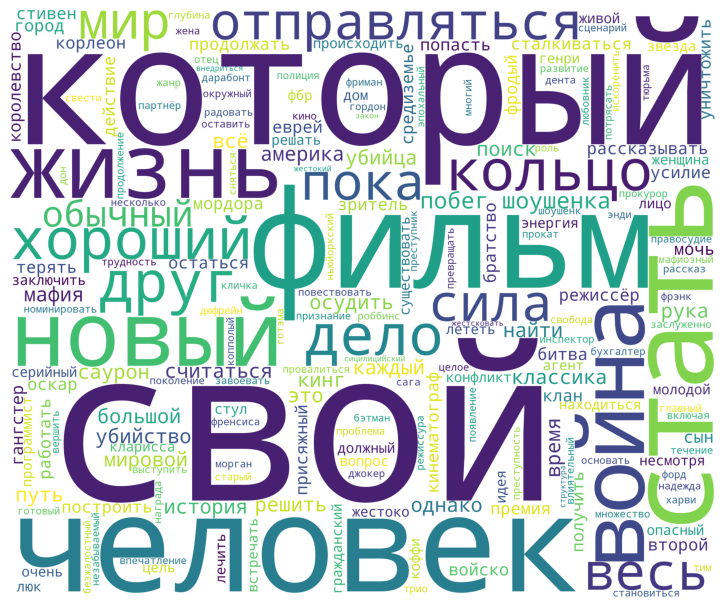

In [473]:
corpus = get_corpus(df['tokenize_text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [474]:
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

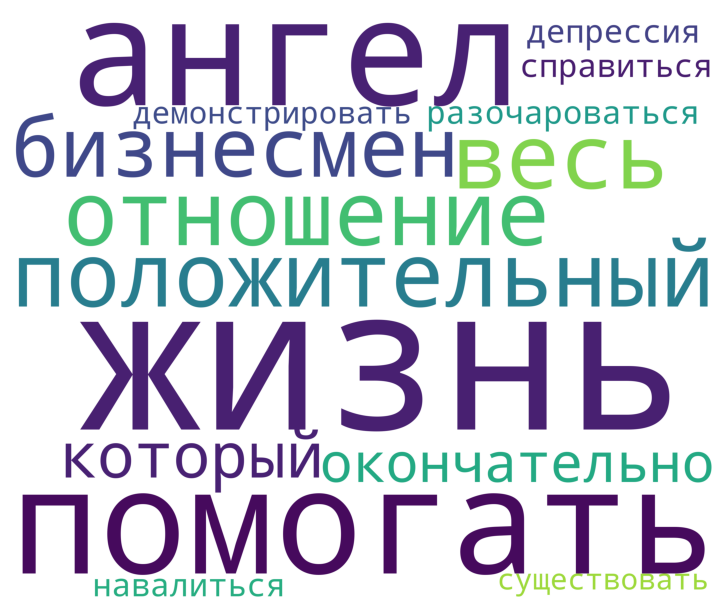

In [475]:
corpus = df['tokenize_text'][20]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [476]:
vectorizer = CountVectorizer()
count_matrix1 = vectorizer.fit(df['tokenize_text'])

In [477]:
len(vectorizer.vocabulary_)

612

In [478]:
print(vectorizer.vocabulary_)

{'побег': 347, 'шоушенка': 605, 'фильм': 575, 'который': 219, 'считаться': 524, 'хороший': 589, 'история': 190, 'кино': 202, 'режиссёр': 452, 'выступить': 71, 'фрэнк': 582, 'дарабонт': 102, 'главный': 83, 'роль': 460, 'сняться': 491, 'тим': 535, 'роббинс': 458, 'морган': 258, 'фриман': 580, 'основать': 326, 'рассказ': 442, 'стивен': 509, 'кинг': 200, 'повествовать': 349, 'бухгалтер': 30, 'энди': 607, 'дюфрейн': 137, 'осудить': 330, 'убийство': 547, 'жена': 141, 'любовник': 234, 'отправляться': 334, 'тюрьма': 545, 'шоушенк': 604, 'сталкиваться': 504, 'многий': 252, 'трудность': 542, 'проблема': 413, 'терять': 532, 'надежда': 271, 'свобода': 467, 'провалиться': 414, 'мировой': 250, 'прокат': 420, 'номинировать': 303, 'несколько': 299, 'премия': 398, 'оскар': 325, 'включая': 47, 'режиссура': 451, 'сценарий': 523, 'получить': 363, 'однако': 316, 'течение': 534, 'время': 60, 'стать': 507, 'классика': 206, 'кинематограф': 201, 'завоевать': 154, 'множество': 254, 'награда': 270, 'признание': 

In [479]:
russian_stopwords = list(russian_stopwords)

In [480]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['tokenize_text'])

In [481]:
count_matrix.shape

(25, 98)

In [482]:
print(count_matrix)

  (0, 91)	6
  (0, 35)	3
  (0, 84)	2
  (0, 93)	4
  (0, 27)	1
  (0, 68)	1
  (0, 81)	1
  (0, 29)	1
  (0, 53)	1
  (0, 87)	1
  (0, 55)	1
  (0, 78)	1
  (0, 86)	1
  (0, 39)	1
  (0, 51)	1
  (0, 60)	1
  (0, 49)	1
  (0, 8)	1
  (0, 79)	2
  (0, 31)	2
  (0, 63)	1
  (0, 73)	1
  (0, 82)	1
  (0, 54)	1
  (0, 80)	1
  :	:
  (23, 12)	1
  (23, 40)	1
  (23, 13)	1
  (23, 58)	1
  (23, 44)	1
  (23, 95)	1
  (23, 5)	1
  (23, 56)	1
  (23, 57)	1
  (23, 69)	1
  (23, 45)	1
  (23, 23)	1
  (23, 50)	1
  (24, 81)	1
  (24, 29)	2
  (24, 53)	1
  (24, 82)	1
  (24, 38)	1
  (24, 71)	1
  (24, 46)	1
  (24, 95)	1
  (24, 5)	1
  (24, 96)	1
  (24, 70)	1
  (24, 36)	1


In [483]:
vectorizer.get_feature_names_out()[100:200]

array([], dtype=object)

In [484]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [485]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenize_text'])

CPU times: total: 0 ns
Wall time: 32 ms


In [486]:
tfidf_matrix.shape

(25, 2172)

In [487]:
print(tfidf_matrix)

  (0, 575)	0.053439779934182266
  (0, 1510)	0.053439779934182266
  (0, 1452)	0.053439779934182266
  (0, 685)	0.053439779934182266
  (0, 704)	0.053439779934182266
  (0, 1786)	0.053439779934182266
  (0, 554)	0.053439779934182266
  (0, 2017)	0.053439779934182266
  (0, 577)	0.053439779934182266
  (0, 200)	0.053439779934182266
  (0, 1021)	0.053439779934182266
  (0, 1153)	0.053439779934182266
  (0, 765)	0.053439779934182266
  (0, 2019)	0.053439779934182266
  (0, 1352)	0.053439779934182266
  (0, 2143)	0.053439779934182266
  (0, 1224)	0.053439779934182266
  (0, 2092)	0.053439779934182266
  (0, 1414)	0.053439779934182266
  (0, 958)	0.053439779934182266
  (0, 904)	0.053439779934182266
  (0, 525)	0.053439779934182266
  (0, 683)	0.053439779934182266
  (0, 703)	0.053439779934182266
  (0, 1847)	0.053439779934182266
  :	:
  (24, 2126)	0.08040570605617901
  (24, 337)	0.08040570605617901
  (24, 54)	0.08040570605617901
  (24, 1421)	0.08040570605617901
  (24, 1475)	0.08040570605617901
  (24, 643)	0.08040

In [488]:
tfidf_vectorizer.get_feature_names_out()[150:160]

array(['включая', 'включая хороший', 'включая хороший фильм',
       'влиятельный', 'влиятельный ньюйоркский',
       'влиятельный ньюйоркский мафиозный', 'внедрить', 'внедриться',
       'внедриться большой', 'внедриться большой бизнес'], dtype=object)

In [489]:
import gensim

In [490]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [491]:
df['tokenize_text2'] = [tokenize2(text) for text in df['tokenize_text']]

In [492]:
df.head()

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,NaN,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...,побег шоушенка фильм который считаться хороший...,"[побег, шоушенка, фильм, который, считаться, х..."
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,NaN,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...,фильм стать классика свой жанр рассказывать ис...,"[фильм, стать, классика, свой, жанр, рассказыв..."
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,NaN,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...,бэтман вершить правосудие готэма партнёр стано...,"[бэтман, вершить, правосудие, готэма, партнёр,..."
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,NaN,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...,продолжение эпохальный сага режиссёр френсиса ...,"[продолжение, эпохальный, сага, режиссёр, френ..."
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,NaN,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...,12 присяжный дело убийство пытаться убедить ос...,"[12, присяжный, дело, убийство, пытаться, убед..."


In [493]:
gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text2'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=5)
gensim_dictionary.compactify()

In [494]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['tokenize_text2']]

In [499]:
# Вариант A: Без фильтрации
gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text2'])
# НЕ ВЫЗЫВАЕМ filter_extremes вообще
gensim_dictionary.compactify()

print(f"Размер словаря без фильтрации: {len(gensim_dictionary)}")

corpus = [gensim_dictionary.doc2bow(text) for text in df['tokenize_text2']]
print(f"Размер корпуса: {len(corpus)}")
print(f"Непустых документов: {sum(1 for doc in corpus if len(doc) > 0)}")

# Проверим первый документ
if len(corpus) > 0 and len(corpus[0]) > 0:
    print(f"Первый документ: {corpus[0][:10]}")

Размер словаря без фильтрации: 614
Размер корпуса: 25
Непустых документов: 25
Первый документ: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [501]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=10, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [503]:
lda_20.print_topics()

[(0,
  '0.026*"кольцо" + 0.020*"отправляться" + 0.020*"поиск" + 0.014*"свой" + 0.014*"человек" + 0.014*"братство" + 0.014*"мордора" + 0.014*"саурон" + 0.014*"фродый" + 0.014*"уничтожить"'),
 (1,
  '0.014*"убийца" + 0.014*"агент" + 0.014*"заключить" + 0.014*"фбр" + 0.014*"вопрос" + 0.014*"кларисса" + 0.014*"осудить" + 0.013*"коффи" + 0.013*"стул" + 0.013*"кинг"'),
 (2,
  '0.016*"решить" + 0.016*"еврей" + 0.016*"свой" + 0.016*"стать" + 0.016*"конфликт" + 0.008*"лечить" + 0.008*"война" + 0.008*"концентрационный" + 0.008*"польша" + 0.008*"член"'),
 (3,
  '0.022*"который" + 0.017*"свой" + 0.017*"всё" + 0.017*"человек" + 0.017*"пока" + 0.011*"дело" + 0.011*"присяжный" + 0.011*"это" + 0.011*"новый" + 0.011*"программист"'),
 (4,
  '0.018*"история" + 0.018*"жизнь" + 0.018*"стать" + 0.010*"свой" + 0.010*"лосанджелес" + 0.010*"джулс" + 0.010*"вега" + 0.010*"уоллес" + 0.010*"винсент" + 0.010*"бандит"'),
 (5,
  '0.020*"свой" + 0.014*"существовать" + 0.014*"идея" + 0.014*"жизнь" + 0.014*"дом" + 0.01

In [505]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_20, corpus, gensim_dictionary)
pyLDAvis.display(vis_data)

In [506]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [507]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_20,
                                     texts=df["tokenize_text2"],
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()

print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.5233711186302501


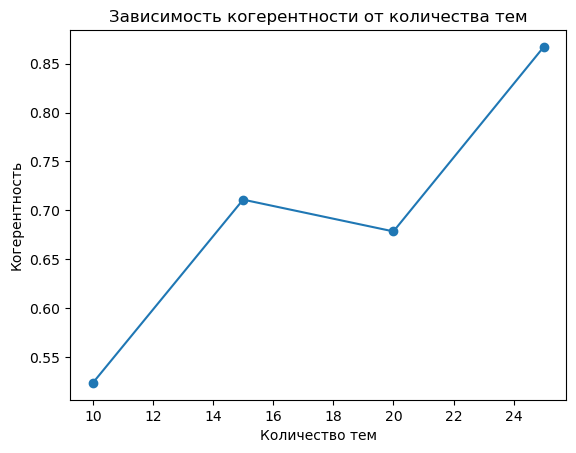

In [508]:
coherence_values = []
for num_topics in range(10, 30, 5):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                             num_topics=num_topics,
                             id2word=gensim_dictionary,
                             passes=10,
                             random_state=6457)
    
    coherence_model = CoherenceModel(model=lda_model,
                                     texts=df["tokenize_text2"],
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
    
    coherence_values.append(coherence_model.get_coherence())

import matplotlib.pyplot as plt

plt.plot(range(10, 30, 5), coherence_values, marker='o')
plt.xlabel("Количество тем")
plt.ylabel("Когерентность")
plt.title("Зависимость когерентности от количества тем")
plt.show()

In [509]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [510]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

In [511]:
pyLDAvis.enable_notebook()

In [512]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.100592 -0.122815       1        1  15.042747
8     -0.142764 -0.095674       2        1  13.583914
1     -0.087138  0.002176       3        1  11.407116
0     -0.017324  0.127213       4        1  11.292578
5      0.057914 -0.033946       5        1  10.821135
7      0.082158  0.025118       6        1  10.320905
9      0.023239  0.064939       7        1   8.993220
2     -0.010112  0.039463       8        1   8.389511
4     -0.014899  0.002799       9        1   6.351640
6      0.008335 -0.009274      10        1   3.797235, topic_info=            Term      Freq     Total Category  logprob  loglift
65         фильм  5.000000  5.000000  Default  30.0000  30.0000
317      обычный  2.000000  2.000000  Default  29.0000  29.0000
155       кольцо  3.000000  3.000000  Default  28.0000  28.0000
55         стать  3.000000  3.000000  Default  27.0000  27.0000
208        жизнь  3.000000  3.000000  Default  26.0000  26.0000
..           ...       ...       ...      ...      ...      ...
396       машина  0.034864  1.222457  Topic10  -6.8044  -0.2863
410  программист  0.035267  1.886986  Topic10  -6.7929  -0.7089
423      энергия  0.035187  1.830364  Topic10  -6.7952  -0.6807
290      человек  0.035811  5.410369  Topic10  -6.7776  -1.7469
255         пока  0.035495  3.139241  Topic10  -6.7865  -1.2114

[437 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
134       1  0.817666            12
518       3  0.563516         агент
109       5  0.432363       америка
109       6  0.432363       америка
266       9  0.982269  американский
...     ...       ...           ...
423       1  0.546340       энергия
423       3  0.546340       энергия
133       6  0.875916    эпохальный
108       1  0.448208           это
558       1  0.817666        япония

[431 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 2, 1, 6, 8, 10, 3, 5, 7])

In [513]:
from sklearn.decomposition import LatentDirichletAllocation

In [514]:
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(count_matrix)

for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: стать, решить, жизнь, свой, попасть, находиться, лечить, работать, всё, весь
Topic 1: новый, должный, дом, цель, путь, звезда, работать, всё, весь, война
Topic 2: дело, свой, существовать, война, время, мировой, серийный, жестоко, серийный убийца, остаться
Topic 3: который, фильм, хороший, свой, жизнь, обычный, считаться, классика, убийство, сталкиваться
Topic 4: свой, пока, человек, сила, каждый, всё, это, гражданский, гражданский война, действие
Topic 5: весь, война, жизнь, человек, звезда, стать, работать, всё, дело, существовать
Topic 6: который, новый, мафия, друг, америка, город, гангстер, война, войско, большой
Topic 7: кинг, весь, история, мир, осудить, клан, рука, несмотря, стивен кинг, стивен
Topic 8: кольцо, саурон, отправляться, средиземье, поиск, фродый, братство кольцо, мордора, уничтожить, братство
Topic 9: свой, убийца, однако, женщина, опасный, решать, молодой, мочь, друг, новый


In [515]:
lda_model = LatentDirichletAllocation(learning_method='online', random_state=5, n_jobs=-1, n_components=11)
lda_model.fit(count_matrix)

LatentDirichletAllocation(learning_method='online', n_components=11, n_jobs=-1,
                          random_state=5)

In [516]:
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,друг,рассказывать,битва,решить,существовать,усилие,мировой война,клан,клан,всё,происходить
1,фродый,несмотря,находиться,гражданский,кольцо,кинг,дом,америка,сила,убийца,мировой
2,звезда,братство кольцо,саурон,отправляться,рука,это,новый,это,режиссёр,несмотря,история
3,хороший,клан,терять,оскар,серийный убийца,дело,рассказывать,гражданский,найти,средиземье,построить
4,убийство,корлеон,отправляться,работать,средиземье,оскар,мочь,молодой,сталкиваться,дело,война
5,энергия,остаться,серийный,решать,стивен кинг,новый,убийство,очень,энергия,кинг,продолжать
6,человек,усилие,жестоко,построить,сталкиваться,история,построить,звезда,попасть,осудить убийство,лечить
7,фильм,человек,второй мировой,остаться,найти,корлеон,мафия,мочь,мочь,мафия,стивен
8,лечить,кольцо,построить,кольцо,режиссёр,стивен,время,жизнь,гражданский война,друг,попасть
9,попасть,мафия,мировой война,саурон,очень,время,считаться,считаться,фильм,стивен кинг,второй мировой


In [517]:
from sklearn.decomposition import NMF

In [518]:
nmf_model = NMF(n_components=5, random_state=0)
nmf_model.fit(tfidf_matrix)
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: фильм, классика, хороший, побег шоушенка, шоушенка, побег, стать, стать классика, история, классика свой
Topic 1: кольцо, саурон, мордора, уничтожить, фродый, братство, братство кольцо, поиск, отправляться, королевство
Topic 2: новый, свой, пока, друг, америка, обычный, дом, цель, мафия, усилие
Topic 3: дело, убийца, серийный убийца, серийный, жестоко, присяжный дело, присяжный, вопрос, агент, агент фбр
Topic 4: жизнь, весь, живой, война, еврей, остаться, мировой война, второй мировой, второй мировой война, второй


C:\Users\V\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [519]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, random_state=0)
lsa_model.fit(tfidf_matrix)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: свой, фильм, который, кольцо, стать, человек, война, хороший, классика, отправляться
Topic 1: кольцо, саурон, фродый, уничтожить, братство, братство кольцо, мордора, поиск, средиземье, королевство
Topic 2: дело, убийца, жестоко, серийный убийца, серийный, присяжный, присяжный дело, агент фбр, агент, фбр
Topic 3: новый, америка, мафия, друг, еврей, цель, дом, война, усилие, построить
Topic 4: жизнь, весь, человек, пока, решить, обычный, ангел помогать положительный, ангел помогать, депрессия демонстрировать, депрессия демонстрировать жизнь
Topic 5: живой, жизнь, второй мировой война, мировой война, остаться, второй, второй мировой, весь, опасный, женщина
Topic 6: жизнь, работать, преступный босс лосанджелес, вега джулс винфилд, винфилд работать, бандит винсент вега, марселлас уоллес преступный, марселлас уоллес, марселлас, босс лосанджелес
Topic 7: обычный, друг, лицо, генри, работать, сила, пока, это, свой, клан
Topic 8: друг, люк, лететь, звезда, генри, стать, приходиться, пр

In [520]:
lsa_model = TruncatedSVD(n_components=5, random_state=0)
lsa_model.fit(tfidf_matrix)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: свой, фильм, который, человек, стать, кольцо, хороший, война, классика, пока
Topic 1: кольцо, саурон, братство, уничтожить, мордора, братство кольцо, фродый, поиск, отправляться, битва
Topic 2: новый, друг, америка, дом, цель, усилие, мафия, война, пока, еврей
Topic 3: дело, убийца, присяжный дело, присяжный, серийный, серийный убийца, жестоко, серийный убийца который, грех, семь смертный грех
Topic 4: еврей, новый, живой, второй, мировой война, второй мировой война, второй мировой, остаться, мировой, весь


In [521]:
df.head(25)

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,NaN,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...,побег шоушенка фильм который считаться хороший...,"[побег, шоушенка, фильм, который, считаться, х..."
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,NaN,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...,фильм стать классика свой жанр рассказывать ис...,"[фильм, стать, классика, свой, жанр, рассказыв..."
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,NaN,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...,бэтман вершить правосудие готэма партнёр стано...,"[бэтман, вершить, правосудие, готэма, партнёр,..."
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,NaN,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...,продолжение эпохальный сага режиссёр френсиса ...,"[продолжение, эпохальный, сага, режиссёр, френ..."
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,NaN,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...,12 присяжный дело убийство пытаться убедить ос...,"[12, присяжный, дело, убийство, пытаться, убед..."
5,Властелин колец 3: Возвращение Короля,The Lord of the Rings: The Return of the King,2003,"США, Новая Зеландия",боевик,201 мин.,NaN,Близится последняя битва за Средиземье. На пут...,близится последняя битва за средиземье на пути...,близиться последний битва за средиземье на пут...,близиться последний битва средиземье путь войс...,"[близиться, последний, битва, средиземье, путь..."
6,Список Шиндлера,Schindler`s List,1993,США,биографический,195 мин.,NaN,Немецкий фабрикант и член нацистской партии Ос...,немецкий фабрикант и член нацистской партии ос...,немецкий фабрикант и член нацистский партия ос...,немецкий фабрикант член нацистский партия оска...,"[немецкий, фабрикант, член, нацистский, партия..."
7,Криминальное чтиво,Pulp Fiction,1994,США,драма,154 мин.,NaN,Три истории из жизни двух бандитов - Винсента ...,три истории из жизни двух бандитов винсента в...,три история из жизнь два бандит винсент вега и...,история жизнь бандит винсент вега джулс винфил...,"[история, жизнь, бандит, винсент, вега, джулс,..."
8,Властелин колец: Братство кольца,The Lord of the Rings: The Fellowship of the Ring,2001,"США, Новая Зеландия",боевик,178 мин.,NaN,Поиски великого кольца Саурона завершены. Оно ...,поиски великого кольца саурона завершены оно п...,поиск великий кольцо саурон завершить оно попа...,поиск великий кольцо саурон завершить оно попа...,"[поиск, великий, кольцо, саурон, завершить, он..."
9,"Хороший, плохой, злой","The Good, the Bad and the Ugly",1966,"Италия, Испания, Германия (ФРГ), США",боевик,161 мин.,NaN,Действие происходит в разгар гражданской войны...,действие происходит в разгар гражданской войны...,действие происходить в разгар гражданский войн...,действие происходить разгар гражданский война ...,"[действие, происходить, разгар, гражданский, в..."


In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_russia    25 non-null     object 
 1   title_english   25 non-null     object 
 2   date            25 non-null     int64  
 3   country         25 non-null     object 
 4   genre           25 non-null     object 
 5   duration        25 non-null     object 
 6   rating          0 non-null      float64
 7   description     25 non-null     object 
 8   prep_text       25 non-null     object 
 9   text_lemm       25 non-null     object 
 10  tokenize_text   25 non-null     object 
 11  tokenize_text2  25 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.5+ KB


In [523]:
df['duration'].value_counts()

duration
142 мин.    2
169 мин.    2
148 мин.    1
207 мин.    1
118 мин.    1
130 мин.    1
127 мин.    1
133 мин.    1
146 мин.    1
136 мин.    1
124 мин.    1
139 мин.    1
175 мин.    1
179 мин.    1
161 мин.    1
178 мин.    1
154 мин.    1
195 мин.    1
201 мин.    1
96 мин.     1
202 мин.    1
152 мин.    1
189 мин.    1
Name: count, dtype: int64

In [524]:
df['duration'] = df['duration'].str.replace(' мин.', '', regex=False)
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
mean_duration = df['duration'].mean()
df['duration'] = df['duration'].fillna(mean_duration)
print(df['duration'].value_counts(dropna=False))

duration
142    2
169    2
148    1
207    1
118    1
130    1
127    1
133    1
146    1
136    1
124    1
139    1
175    1
179    1
161    1
178    1
154    1
195    1
201    1
96     1
202    1
152    1
189    1
Name: count, dtype: int64


In [525]:
df['date'].value_counts()

date
1994    3
1999    3
2008    1
1980    1
1954    1
1991    1
1946    1
1995    1
1975    1
2014    1
1990    1
2010    1
1974    1
1972    1
2002    1
1966    1
2001    1
1993    1
2003    1
1957    1
1998    1
Name: count, dtype: int64

In [526]:
df['date'] = pd.to_numeric(df['date'], errors='coerce')
df['date'].value_counts()

date
1994    3
1999    3
2008    1
1980    1
1954    1
1991    1
1946    1
1995    1
1975    1
2014    1
1990    1
2010    1
1974    1
1972    1
2002    1
1966    1
2001    1
1993    1
2003    1
1957    1
1998    1
Name: count, dtype: int64

In [527]:
df['rating'].value_counts()

Series([], Name: count, dtype: int64)

In [528]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
mean_rating = df['rating'].mean()
df['rating'] = df['rating'].fillna(mean_rating)
df['rating'].value_counts()

Series([], Name: count, dtype: int64)

In [529]:
df['genre'].value_counts()

genre
боевик            10
драма              9
детектив           4
биографический     2
Name: count, dtype: int64

In [530]:
from sklearn.cluster import KMeans

In [531]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['genre_number'] = label_encoder.fit_transform(df['genre'])

In [532]:
df['genre_number'].value_counts()

genre_number
1    10
3     9
2     4
0     2
Name: count, dtype: int64

In [533]:
df['rating'] = df['rating'].astype(float)
df['duration'] = df['duration'].astype(float)
df['date'] = df['date'].astype(float)

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_russia    25 non-null     object 
 1   title_english   25 non-null     object 
 2   date            25 non-null     float64
 3   country         25 non-null     object 
 4   genre           25 non-null     object 
 5   duration        25 non-null     float64
 6   rating          0 non-null      float64
 7   description     25 non-null     object 
 8   prep_text       25 non-null     object 
 9   text_lemm       25 non-null     object 
 10  tokenize_text   25 non-null     object 
 11  tokenize_text2  25 non-null     object 
 12  genre_number    25 non-null     int32  
dtypes: float64(3), int32(1), object(9)
memory usage: 2.6+ KB


In [535]:
from sklearn.preprocessing import MinMaxScaler

In [536]:
X = df.loc[:, ['date', 'duration', 'rating', 'genre_number']].values

In [537]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(X)
data_normalized = pd.DataFrame(data_normalized, columns=['date', 'duration', 'rating', 'genre_number'])

print("\nДанные после работы нормализации:")
print(data_normalized)


Данные после работы нормализации:
        date  duration  rating  genre_number
0   0.705882  0.414414     NaN      1.000000
1   0.382353  0.711712     NaN      1.000000
2   0.911765  0.504505     NaN      0.333333
3   0.411765  0.954955     NaN      1.000000
4   0.161765  0.000000     NaN      0.666667
5   0.838235  0.945946     NaN      0.333333
6   0.691176  0.891892     NaN      0.000000
7   0.705882  0.522523     NaN      1.000000
8   0.808824  0.738739     NaN      0.333333
9   0.294118  0.585586     NaN      0.333333
10  0.705882  0.414414     NaN      1.000000
11  0.823529  0.747748     NaN      0.333333
12  0.779412  0.387387     NaN      1.000000
13  0.941176  0.468468     NaN      0.333333
14  0.500000  0.252252     NaN      0.333333
15  0.779412  0.360360     NaN      0.333333
16  0.647059  0.450450     NaN      0.000000
17  1.000000  0.657658     NaN      0.666667
18  0.426471  0.333333     NaN      1.000000
19  0.720588  0.279279     NaN      0.666667
20  0.000000  0.3063

C:\Users\V\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\V\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [538]:
print(df[['date', 'duration', 'rating', 'genre_number']].isnull().sum())
print(df[['date', 'duration', 'rating', 'genre_number']].dtypes)

date             0
duration         0
rating          25
genre_number     0
dtype: int64
date            float64
duration        float64
rating          float64
genre_number      int32
dtype: object


In [539]:
X = tfidf_matrix

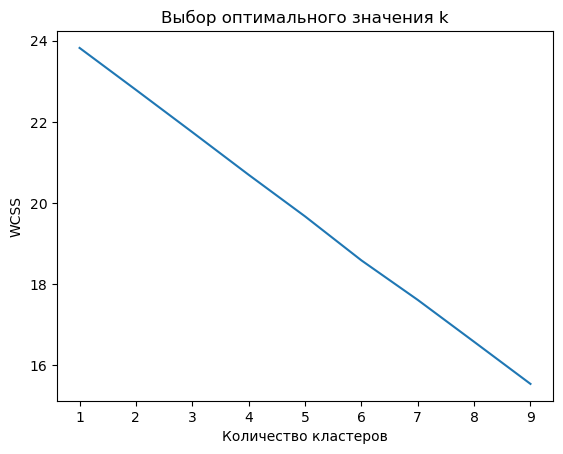

In [540]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Выбор оптимального значения k')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [541]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)

In [542]:
%%time
km.fit(X)

CPU times: total: 172 ms
Wall time: 170 ms


KMeans(n_clusters=7)

In [543]:
pred=kmeans.fit_predict(X)
clusters = km.labels_.tolist()

In [544]:
clusters[:10]

[4, 6, 0, 0, 2, 3, 1, 6, 3, 5]

In [545]:
cluster_kmeans = km.labels_.tolist()
df['cluster'] = cluster_kmeans
df['cluster'].value_counts()

cluster
5    7
6    6
2    3
3    3
4    2
0    2
1    2
Name: count, dtype: int64

In [546]:
df[df['cluster']==0]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
2,Темный рыцарь,The Dark Knight,2008.0,США,боевик,152.0,NaN,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...,бэтман вершить правосудие готэма партнёр стано...,"[бэтман, вершить, правосудие, готэма, партнёр,...",1,0
3,Крестный отец 2,The Godfather: Part II,1974.0,США,драма,202.0,NaN,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...,продолжение эпохальный сага режиссёр френсиса ...,"[продолжение, эпохальный, сага, режиссёр, френ...",3,0


In [547]:
df[df['cluster']==1]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
6,Список Шиндлера,Schindler`s List,1993.0,США,биографический,195.0,NaN,Немецкий фабрикант и член нацистской партии Ос...,немецкий фабрикант и член нацистской партии ос...,немецкий фабрикант и член нацистский партия ос...,немецкий фабрикант член нацистский партия оска...,"[немецкий, фабрикант, член, нацистский, партия...",0,1
23,Спасти рядового Райана,Saving Private Ryan,1998.0,США,боевик,169.0,NaN,Вторая Мировая Война. Одна женщина теряет трои...,вторая мировая война одна женщина теряет троих...,второй мировой война один женщина терять трое ...,второй мировой война женщина терять трое свой ...,"[второй, мировой, война, женщина, терять, трое...",1,1


In [548]:
df[df['cluster']==2]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
4,12 разгневанных мужчин,12 Angry Men,1957.0,США,детектив,96.0,NaN,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...,12 присяжный дело убийство пытаться убедить ос...,"[12, присяжный, дело, убийство, пытаться, убед...",2,2
19,Семь,Se7en,1995.0,CША,детектив,127.0,NaN,Двое полицейских расследуют дело серийного уби...,двое полицейских расследуют дело серийного уби...,двое полицейский расследовать дело серийный уб...,двое полицейский расследовать дело серийный уб...,"[двое, полицейский, расследовать, дело, серийн...",2,2
21,Молчание ягнят,The Silence of the Lambs,1991.0,США,детектив,118.0,NaN,"Клариссе Стерлинг, молодому агенту ФБР, поруче...",клариссе стерлинг молодому агенту фбр поручено...,кларисса стерлинг молодой агент фбр поручить р...,кларисса стерлинг молодой агент фбр поручить р...,"[кларисса, стерлинг, молодой, агент, фбр, пору...",2,2


In [549]:
df[df['cluster']==3]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
5,Властелин колец 3: Возвращение Короля,The Lord of the Rings: The Return of the King,2003.0,"США, Новая Зеландия",боевик,201.0,NaN,Близится последняя битва за Средиземье. На пут...,близится последняя битва за средиземье на пути...,близиться последний битва за средиземье на пут...,близиться последний битва средиземье путь войс...,"[близиться, последний, битва, средиземье, путь...",1,3
8,Властелин колец: Братство кольца,The Lord of the Rings: The Fellowship of the Ring,2001.0,"США, Новая Зеландия",боевик,178.0,NaN,Поиски великого кольца Саурона завершены. Оно ...,поиски великого кольца саурона завершены оно п...,поиск великий кольцо саурон завершить оно попа...,поиск великий кольцо саурон завершить оно попа...,"[поиск, великий, кольцо, саурон, завершить, он...",1,3
11,Властелин колец 2: Две крепости,The Lord of the Rings: The Two Towers,2002.0,"США, Новая Зеландия",боевик,179.0,NaN,Братство кольца распалось. Фродо и Сэм продолж...,братство кольца распалось фродо и сэм продолжа...,братство кольцо распасться фродый и сэм продол...,братство кольцо распасться фродый сэм продолжа...,"[братство, кольцо, распасться, фродый, сэм, пр...",1,3


In [550]:
df[df['cluster']==4]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
0,Побег из Шоушенка,The Shawshank Redemption,1994.0,США,драма,142.0,NaN,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...,побег шоушенка фильм который считаться хороший...,"[побег, шоушенка, фильм, который, считаться, х...",3,4
13,Начало,Inception,2010.0,"США, Великобритания",боевик,148.0,NaN,"В мире будущего, где существуют технологии, по...",в мире будущего где существуют технологии позв...,в мир будущее где существовать технология позв...,мир будущее существовать технология позволять ...,"[мир, будущее, существовать, технология, позво...",1,4


In [551]:
df[df['cluster']==5]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
9,"Хороший, плохой, злой","The Good, the Bad and the Ugly",1966.0,"Италия, Испания, Германия (ФРГ), США",боевик,161.0,NaN,Действие происходит в разгар гражданской войны...,действие происходит в разгар гражданской войны...,действие происходить в разгар гражданский войн...,действие происходить разгар гражданский война ...,"[действие, происходить, разгар, гражданский, в...",1,5
12,Бойцовский клуб,Fight Club,1999.0,"Германия, США",драма,139.0,NaN,"Обычный клерк, угнетенный своей обыденной жизн...",обычный клерк угнетенный своей обыденной жизнь...,обычный клерк угнести свой обыденный жизнь и т...,обычный клерк угнести свой обыденный жизнь тор...,"[обычный, клерк, угнести, свой, обыденный, жиз...",3,5
14,Звездные войны: Эпизод 5 - Империя наносит отв...,Star Wars: Episode V - The Empire Strikes Back,1980.0,США,боевик,124.0,NaN,В Галактике идет война. Имперские войска наход...,в галактике идет война имперские войска находя...,в галактика идти война имперский войско находи...,галактика идти война имперский войско находить...,"[галактика, идти, война, имперский, войско, на...",1,5
15,Матрица,The Matrix,1999.0,США,боевик,136.0,NaN,"Он жил своими серыми буднями, он был очень тал...",он жил своими серыми буднями он был очень тала...,он жить свой серый будни он быть очень талантл...,жить свой серый будни очень талантливый програ...,"[жить, свой, серый, будни, очень, талантливый,...",1,5
16,Славные парни,Goodfellas,1990.0,США,биографический,146.0,NaN,Начинающий молодой гангстер Генри Хилл со свои...,начинающий молодой гангстер генри хилл со свои...,начинающий молодой гангстер генри хилла с свой...,начинающий молодой гангстер генри хилла свой з...,"[начинающий, молодой, гангстер, генри, хилла, ...",0,5
17,Интерстеллар,Interstellar,2014.0,США,детектив,169.0,NaN,Земля изживает себя и человечество должно иска...,земля изживает себя и человечество должно иска...,земля изживать себя и человечество должный иск...,земля изживать человечество должный искать нов...,"[земля, изживать, человечество, должный, искат...",2,5
22,Семь самураев,Seven Samurai,1954.0,Япония,боевик,207.0,NaN,"Исторический фильм, действие которого происход...",исторический фильм действие которого происходи...,исторический фильм действие который происходит...,исторический фильм действие который происходит...,"[исторический, фильм, действие, который, проис...",1,5


In [552]:
df[df['cluster']==6]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
1,Крестный отец,The Godfather,1972.0,США,драма,175.0,NaN,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...,фильм стать классика свой жанр рассказывать ис...,"[фильм, стать, классика, свой, жанр, рассказыв...",3,6
7,Криминальное чтиво,Pulp Fiction,1994.0,США,драма,154.0,NaN,Три истории из жизни двух бандитов - Винсента ...,три истории из жизни двух бандитов винсента в...,три история из жизнь два бандит винсент вега и...,история жизнь бандит винсент вега джулс винфил...,"[история, жизнь, бандит, винсент, вега, джулс,...",3,6
10,Форрест Гамп,Forrest Gump,1994.0,США,драма,142.0,NaN,Форресту Гампу - умственно отсталому человеку ...,форресту гампу умственно отсталому человеку с...,форрест гампа умственно отсталый человек с доб...,форрест гампа умственно отсталый человек добры...,"[форрест, гампа, умственно, отсталый, человек,...",3,6
18,Пролетая над гнездом кукушки,One Flew Over the Cuckoo`s Nest,1975.0,США,драма,133.0,NaN,Один бродяга решил отдохнуть за государственны...,один бродяга решил отдохнуть за государственны...,один бродяга решить отдохнуть за государственн...,бродяга решить отдохнуть государственный счёт ...,"[бродяга, решить, отдохнуть, государственный, ...",3,6
20,Эта замечательная жизнь,It`s a Wonderful Life,1946.0,США,драма,130.0,NaN,Ангел помогает положительному во всех отношени...,ангел помогает положительному во всех отношени...,ангел помогать положительный в весь отношение ...,ангел помогать положительный весь отношение би...,"[ангел, помогать, положительный, весь, отношен...",3,6
24,Зеленая миля,The Green Mile,1999.0,США,драма,189.0,NaN,Чернокожий осужденный Джон Коффи (Майкл Кларк ...,чернокожий осужденный джон коффи майкл кларк д...,чернокожий осудить джон коффи майкл кларк дунк...,чернокожий осудить джон коффи майкл кларк дунк...,"[чернокожий, осудить, джон, коффи, майкл, клар...",3,6


In [553]:
top_rated_movies = (df[df['cluster'] == 0]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 0:")
print(top_rated_movies)
print("\n")
cluster_0_count = len(df[df['cluster'] == 0])
print(f"Количество фильмов в кластере 0: {cluster_0_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 0:
      title_russia  rating
2    Темный рыцарь     NaN
3  Крестный отец 2     NaN


Количество фильмов в кластере 0: 2


In [554]:
top_rated_movies = (df[df['cluster'] == 1]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 1:")
print(top_rated_movies)
print("\n")
cluster_1_count = len(df[df['cluster'] == 1])
print(f"Количество фильмов в кластере 1: {cluster_1_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 1:
              title_russia  rating
6          Список Шиндлера     NaN
23  Спасти рядового Райана     NaN


Количество фильмов в кластере 1: 2


In [555]:
top_rated_movies = (df[df['cluster'] == 2]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 2:")
print(top_rated_movies)
print("\n")
cluster_2_count = len(df[df['cluster'] == 2])
print(f"Количество фильмов в кластере 2: {cluster_2_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 2:
              title_russia  rating
4   12 разгневанных мужчин     NaN
19                    Семь     NaN
21          Молчание ягнят     NaN


Количество фильмов в кластере 2: 3


In [556]:
top_rated_movies = (df[df['cluster'] == 3]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 3:")
print(top_rated_movies)
print("\n")
cluster_3_count = len(df[df['cluster'] == 3])
print(f"Количество фильмов в кластере 3: {cluster_3_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 3:
                             title_russia  rating
5   Властелин колец 3: Возвращение Короля     NaN
8        Властелин колец: Братство кольца     NaN
11        Властелин колец 2: Две крепости     NaN


Количество фильмов в кластере 3: 3


In [557]:
top_rated_movies = (df[df['cluster'] == 4]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 4:")
print(top_rated_movies)
print("\n")
cluster_4_count = len(df[df['cluster'] == 4])
print(f"Количество фильмов в кластере 4: {cluster_4_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 4:
         title_russia  rating
0   Побег из Шоушенка     NaN
13             Начало     NaN


Количество фильмов в кластере 4: 2


In [558]:
top_rated_movies = (df[df['cluster'] == 5]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 5:")
print(top_rated_movies)
print("\n")
cluster_5_count = len(df[df['cluster'] == 5])
print(f"Количество фильмов в кластере 5: {cluster_5_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 5:
                                         title_russia  rating
9                               Хороший, плохой, злой     NaN
12                                    Бойцовский клуб     NaN
14  Звездные войны: Эпизод 5 - Империя наносит отв...     NaN
15                                            Матрица     NaN
16                                      Славные парни     NaN


Количество фильмов в кластере 5: 7


In [559]:
top_rated_movies = (df[df['cluster'] == 6]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 6:")
print(top_rated_movies)
print("\n")
cluster_6_count = len(df[df['cluster'] == 6])
print(f"Количество фильмов в кластере 6: {cluster_6_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 6:
                    title_russia  rating
1                  Крестный отец     NaN
7             Криминальное чтиво     NaN
10                  Форрест Гамп     NaN
18  Пролетая над гнездом кукушки     NaN
20       Эта замечательная жизнь     NaN


Количество фильмов в кластере 6: 6


In [560]:
df['cluster'] = cluster_kmeans
cluster_stats = df.groupby('cluster').agg({
    'duration': ['mean', 'median', 'min', 'max'],
    'date': ['mean', 'median', 'min', 'max'],
    'rating': ['mean', 'median', 'min', 'max', 'count']
}).round(2)

print(cluster_stats)

        duration                         date                         rating  \
            mean median    min    max    mean  median     min     max   mean   
cluster                                                                        
0         177.00  177.0  152.0  202.0  1991.0  1991.0  1974.0  2008.0    NaN   
1         182.00  182.0  169.0  195.0  1995.5  1995.5  1993.0  1998.0    NaN   
2         113.67  118.0   96.0  127.0  1981.0  1991.0  1957.0  1995.0    NaN   
3         186.00  179.0  178.0  201.0  2002.0  2002.0  2001.0  2003.0    NaN   
4         145.00  145.0  142.0  148.0  2002.0  2002.0  1994.0  2010.0    NaN   
5         154.57  146.0  124.0  207.0  1986.0  1990.0  1954.0  2014.0    NaN   
6         153.83  148.0  130.0  189.0  1980.0  1984.5  1946.0  1999.0    NaN   

                              
        median min max count  
cluster                       
0          NaN NaN NaN     0  
1          NaN NaN NaN     0  
2          NaN NaN NaN     0  
3          Na

In [561]:
def tokenize3(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens
df.head()


,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
0,Побег из Шоушенка,The Shawshank Redemption,1994.0,США,драма,142.0,NaN,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...,побег шоушенка фильм который считаться хороший...,"[побег, шоушенка, фильм, который, считаться, х...",3,4
1,Крестный отец,The Godfather,1972.0,США,драма,175.0,NaN,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...,фильм стать классика свой жанр рассказывать ис...,"[фильм, стать, классика, свой, жанр, рассказыв...",3,6
2,Темный рыцарь,The Dark Knight,2008.0,США,боевик,152.0,NaN,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...,бэтман вершить правосудие готэма партнёр стано...,"[бэтман, вершить, правосудие, готэма, партнёр,...",1,0
3,Крестный отец 2,The Godfather: Part II,1974.0,США,драма,202.0,NaN,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...,продолжение эпохальный сага режиссёр френсиса ...,"[продолжение, эпохальный, сага, режиссёр, френ...",3,0
4,12 разгневанных мужчин,12 Angry Men,1957.0,США,детектив,96.0,NaN,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...,12 присяжный дело убийство пытаться убедить ос...,"[12, присяжный, дело, убийство, пытаться, убед...",2,2


In [562]:
n_clusters = 7
n_top_words = 10

for cluster_id in range(n_clusters):
    cluster_texts = df[df['cluster'] == cluster_id]['title_russia']
    
    vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words=russian_stopwords)
    X = vectorizer.fit_transform(cluster_texts)
    
    lda = LatentDirichletAllocation(n_components=4, random_state=42)  
    lda.fit(X)
    
    feature_names = vectorizer.get_feature_names_out()
    print(f"\nКластер {cluster_id}:")
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {', '.join(top_words)}")


Кластер 0:
Topic 0: отец, крестный, темный, рыцарь
Topic 1: отец, крестный, темный, рыцарь
Topic 2: темный, рыцарь, отец, крестный
Topic 3: отец, крестный, темный, рыцарь

Кластер 1:
Topic 0: шиндлера, список, спасти, рядового, райана
Topic 1: спасти, рядового, райана, шиндлера, список
Topic 2: шиндлера, список, спасти, рядового, райана
Topic 3: шиндлера, список, спасти, рядового, райана

Кластер 2:
Topic 0: семь, ягнят, молчание, разгневанных, мужчин, 12
Topic 1: ягнят, молчание, семь, разгневанных, мужчин, 12
Topic 2: разгневанных, мужчин, 12, семь, ягнят, молчание
Topic 3: семь, ягнят, молчание, разгневанных, мужчин, 12

Кластер 3:
Topic 0: короля, возвращение, кольца, братство, крепости, две
Topic 1: кольца, братство, короля, возвращение, крепости, две
Topic 2: кольца, братство, короля, возвращение, крепости, две
Topic 3: крепости, две, кольца, братство, короля, возвращение

Кластер 4:
Topic 0: начало, шоушенка, побег
Topic 1: шоушенка, побег, начало
Topic 2: начало, шоушенка, поб

In [563]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['tokenize_text'], df['cluster'], 
                                                      test_size=0.3, 
                                                      random_state=0)

In [564]:
len(X_train)

17

In [565]:
len(X_test)

8

In [566]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [567]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3), stop_words=russian_stopwords)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [568]:
from sklearn.metrics import classification_report

In [569]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [570]:
y_pred = model_rf.predict(X_test_tfidf)

In [571]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.12      1.00      0.22         1

    accuracy                           0.12         8
   macro avg       0.03      0.20      0.04         8
weighted avg       0.02      0.12      0.03         8



C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [572]:
y_pred

array([6, 6, 6, 6, 6, 6, 6, 6], dtype=int64)

In [573]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [574]:
y_pred = model_knn.predict(X_test_tfidf)

In [575]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         1

    accuracy                           0.38         8
   macro avg       0.28      0.28      0.28         8
weighted avg       0.38      0.38      0.38         8



C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_clas

In [576]:
y_pred

array([4, 5, 2, 5, 4, 5, 0, 4], dtype=int64)

In [577]:
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [578]:
y_pred = model_lr.predict(X_test_tfidf)

In [579]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.12      1.00      0.22         1

    accuracy                           0.12         8
   macro avg       0.03      0.20      0.04         8
weighted avg       0.02      0.12      0.03         8



C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [580]:
y_pred

array([6, 6, 6, 6, 6, 6, 6, 6], dtype=int64)

In [581]:
decision_tree_regressor = DecisionTreeClassifier()
decision_tree_regressor.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [582]:
y_pred = decision_tree_regressor.predict(X_test_tfidf)

In [583]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         1

    accuracy                           0.50         8
   macro avg       0.38      0.53      0.41         8
weighted avg       0.41      0.50      0.42         8



C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [584]:
y_pred

array([0, 0, 2, 5, 5, 5, 0, 0], dtype=int64)

In [585]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model_knn, f)

In [586]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [587]:
df.to_csv('film.csv')